In [4]:
from FeatureEngineering import *
from sklearn.metrics import precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_data = my_read_csv('train_data.csv')
test_data = my_read_csv('test_data.csv')

In [16]:
X_train,y_train = train_data.loc[:,train_data.columns != 'TARGET'],train_data.loc[:,['TARGET']]
X_test,y_test = test_data.loc[:,test_data.columns != 'TARGET'],test_data.loc[:,['TARGET']]

In [17]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [18]:
train_data.isnull().sum().sum()

0

In [ ]:
# X_train

In [19]:
def evaluate(estimator, X_test, y_test, X_train, y_train):
    y_pre_train = estimator.predict(X_train)
    recall_train = recall_score(y_train, y_pre_train)
    precision_train = precision_score(y_train, y_pre_train)
    y_pre_test = estimator.predict(X_test)
    recall_test = recall_score(y_test, y_pre_test)
    y_pre_prob_train = estimator.predict_proba(X_train)[:, 1]
    roc_auc_train = roc_auc_score(y_train, y_pre_prob_train)
    acc_train = accuracy_score(y_train, y_pre_train)
    y_pre_prob_test = estimator.predict_proba(X_test)[:, 1]
    precision_test = precision_score(y_test, y_pre_test)
    acc_test = accuracy_score(y_test, y_pre_test)
    roc_auc_test = roc_auc_score(y_test, y_pre_prob_test)
    train_ev_list = [recall_train, precision_train, roc_auc_train,acc_train]
    test_ev_list = [recall_test,precision_test,roc_auc_test,acc_test]
    ev_df = pd.DataFrame(data = [train_ev_list, test_ev_list], index=['Train','Test'], columns = ['Recall score','Precision','Roc-auc score','Accuracy']).T
    plot_confusion_matrix(clf, X_test, y_test)
    return ev_df.round(4)



The evaluation matrix for Decision Tree

,Train,Test
Recall score,1.0,0.8140
Precision,1.0,0.7848
Roc-auc score,1.0,0.8981
Accuracy,1.0,0.9700


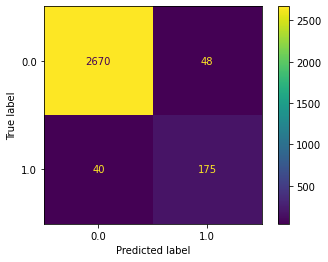

In [20]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
evaluate(clf, X_test, y_test, X_train, y_train)

As we can see, radom forest has lower variance than Decision tree.

## Tune Decision Tree

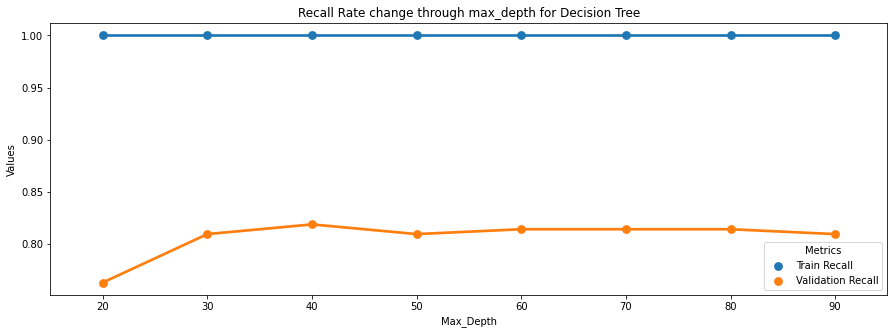

In [74]:
val_recall = []
train_recall = []
tree_depths = []

for depth in range(20,100,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    tree_depths.append(depth)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through max_depth for Decision Tree')
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

,Train,Test
Recall score,1.0,0.7907
Precision,1.0,1.0000
Roc-auc score,1.0,0.9856
Accuracy,1.0,0.9847


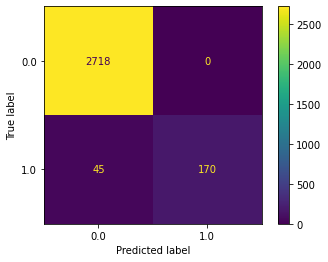

In [21]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
evaluate(clf, X_test, y_test, X_train, y_train)

In [37]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


## Tune Random Forest

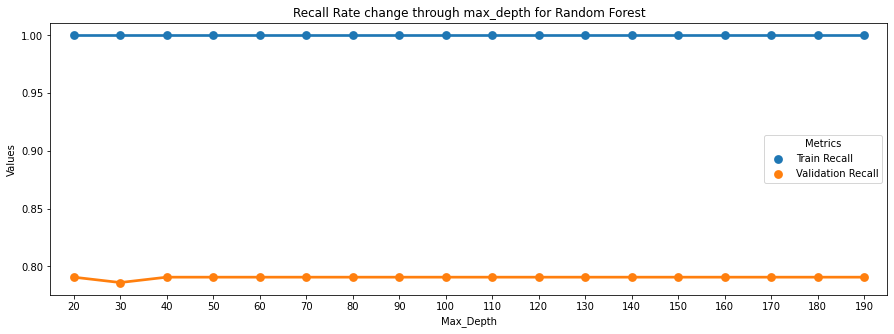

In [75]:
val_recall = []
train_recall = []
tree_depths = []

for depth in range(20,200,10):
    tree_clf = RandomForestClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    tree_depths.append(depth)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through max_depth for Random Forest')
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

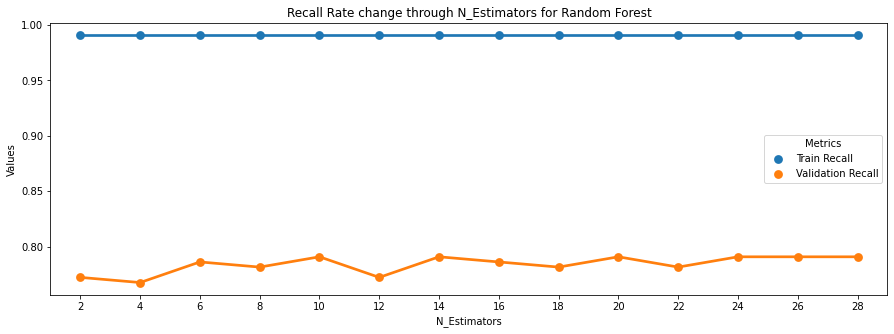

In [90]:
val_recall = []
train_recall = []
estimator_num_list = []

for e_num in range(2,30,2):
    tree_clf = RandomForestClassifier(n_estimators=e_num)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    estimator_num_list.append(e_num)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "N_Estimators": estimator_num_list }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('N_Estimators',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through N_Estimators for Random Forest')
sns.pointplot(x="N_Estimators", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
val_recall = []
train_recall = []
min_samples_split = []

for split in np.arange(2,30,2):
    tree_clf = RandomForestClassifier(min_samples_split=split)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    min_samples_split.append(split)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "Min_Samples_Split": min_samples_split }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Min_Samples_Split',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through Min_Samples_Split for Random Forest')
sns.pointplot(x="Min_Samples_Split", y="Values",hue="Metrics", data=plot_df,ax=ax)

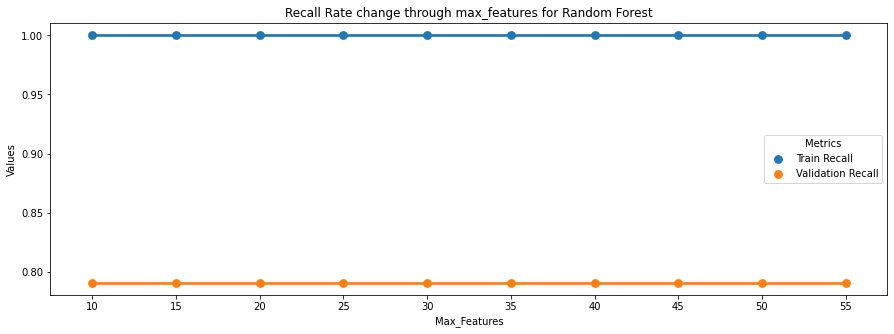

In [89]:
val_recall = []
train_recall = []
max_features = []

for feature_num in range(10,60,5):
    tree_clf = RandomForestClassifier(max_features=feature_num)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    max_features.append(feature_num)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "Max_Features": max_features }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Features',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through max_features for Random Forest')
sns.pointplot(x="Max_Features", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
val_recall = []
train_recall = []
min_sample_leaves = []

for leave in range(1,10,1):
    tree_clf = RandomForestClassifier(min_samples_leaf=leave)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_recall = recall_score(y_train, y_training_pred)
    y_test_pred = tree_clf.predict(X_test)
    test_val_recall = recall_score(y_test, y_test_pred)
    train_val_recall = recall_score(y_train, y_training_pred)
    val_recall.append(test_val_recall)
    min_sample_leaves.append(leave)
    

Tuning_Max_depth = {'Train Recall': train_recall,"Validation Recall":val_recall, "Min_Samples_Leave": min_sample_leaves }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Min_Samples_Leave',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
plt.title('Recall Rate change through min_samples_leave for Random Forest')
sns.pointplot(x="Min_Samples_Leave", y="Values",hue="Metrics", data=plot_df,ax=ax)

## Recursive Feature Selection(very slow)

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

# Extract knowledge from model

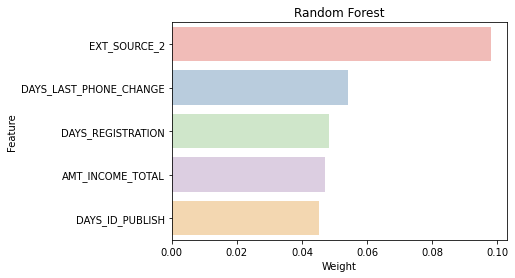

In [63]:
Rfclf_fea = pd.DataFrame(clf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

In [59]:
param = {'criterion': ['entropy', 'gini'],
              #  'max_depth': [2],
               'max_features': ['auto'],
              #  'min_samples_leaf': [0, 1],
              #  'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 200, 300]}

In [ ]:
# !pip install tpot
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 10, population_size= 50, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'recall')
tpot_classifier.fit(X_train,y_train)

,Train,Test
Recall score,0.4128,0.4000
Precision,0.9392,0.9348
Roc-auc score,0.8747,0.8586
Accuracy,0.9550,0.9540


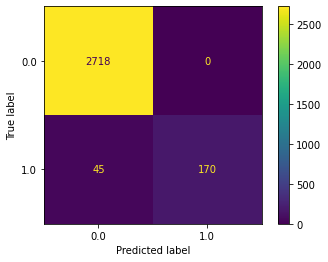

In [58]:
evaluate(tpot_classifier, X_test, y_test, X_train, y_train)